# EXERCISE 7, K-Means Clustering

### Image Compression (256 to 16 colours)

Load the image from the mat lab file given. 

This creates a three-dimensional matrix A whose first two indices identify a pixel position and whose last index represents red, green, or blue. For example, A(50, 33, 3) gives the blue intensity of the pixel at row 50 and column 33.

Note: I'm sure there are libraries to load this data from the png file directly if needed.

A shape = (128, 128, 3) Number of pixels N =  16384


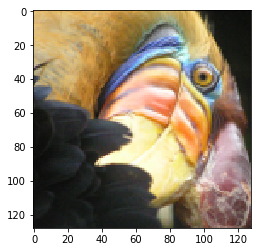

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# load data from matlab file 
import scipy.io
data = scipy.io.loadmat('bird_small.mat')

A = data['A']
N = A.shape[0]*A.shape[1]
print('A shape =', A.shape, 'Number of pixels N = ', N)

plt.imshow(A)
plt.show()

Run K-means to reduce the colour depth to 16. Notice that you have significantly reduced the number of bits that are required to describe the image. The original image required 24 bits for each one of the 128×128 pixel locations, resulting in total size of 128 × 128 × 24 = 393, 216 bits. The new representation requires some overhead storage in form of a dictionary of 16 colors, each of which require 24 bits, but the image itself then only requires 4 bits per pixel location. The final number of bits used is therefore 16 × 24 + 128 × 128 × 4 = 65, 920 bits, which corresponds to compressing the original image by about a factor of 6.

In [82]:
#A = A / 255

# Reshape the image A into an Nx3 matrix where N = number of pixels.
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X that we will use K-Means on.
X = A.reshape(N,3)

# set K-means with k=16
kmeans = KMeans(16)

# Fitting with inputs
kmeans = kmeans.fit(X)

# Predicting the clusters
labels = kmeans.predict(X)
print('labels shape', labels.shape)
print('labels=', labels)

# Getting the cluster centers
C = kmeans.cluster_centers_
print('C Shape', C.shape)
#print('C', C)

labels shape (16384,)
labels= [15 15 15 ...  0  0  0]
C Shape (16, 3)


Plot the new image and check it looks similar

Centroids [[ 42  42  40]
 [211 190 188]
 [117  99  90]
 [234 145  64]
 [ 73  66  66]
 [193 155  87]
 [ 21  23  20]
 [178 160 143]
 [166 120  54]
 [249 241 208]
 [149 127 114]
 [118  84  46]
 [144 183 221]
 [ 98 116 164]
 [245 219 161]
 [221 183 116]]
Original image


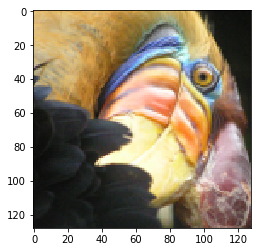

New image


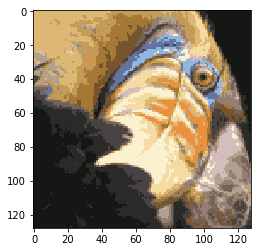

In [85]:
# Round centroids to nearest integer
C = C.astype(int)
print('Centroids', C)

new_image=[]
for i,idx in enumerate(labels):
        new_image.append(C[idx])

new_image=np.asarray(new_image)
new_image=new_image.reshape(128,128,3)

print('Original image')
plt.imshow(A)
plt.show()
print('New image')
plt.imshow(new_image)
plt.show()